In [ ]:
!pip install autocorrect
!python -m spacy download pt_core_news_sm

In [ ]:
import string
import re
import pandas as pd
import html as html
import numpy as np

from autocorrect import Speller

from textblob import TextBlob

from datetime import datetime

import nltk
from nltk.corpus import stopwords

from google.colab import files

import spacy
nlp = spacy.load('pt_core_news_sm')

#spell = Speller(lang='pt')

## CLEAR DATA

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
special_chars = "áéíóúãõàèìòùçâêîôû"
allow = string.ascii_letters + string.whitespace + special_chars

badword_default_old = ['baguete','globo','joão','comics','josé','techtudo',
                   'francisco','parque','botânico','luiz']

def lines_to_array(filename):
  array = []
  with open(filename) as curfile:
    array = curfile.read().splitlines()
  return array

badword_default = lines_to_array('/content/drive/MyDrive/DEV/Python/Datasets/TCC/bw_default.txt')

def remove_word(word, text):
    regular_expression = rf"\b{word}\b"
    return re.sub(regular_expression, "", text)

def remove_words(text, wordlist):
  for word in wordlist:
    text = remove_word(word, text)
  return text

def clear_text(text):
  # lower
  text_clear = text.lower()

  # remove symbols and numbers
  text_clear = re.sub('[^%s]' % allow, '', text_clear)

  #remove query
  text_clear = remove_words(text_clear, ['vale','petrobras','itaú', 'ambev','bradesco'])

  # remove stopwords
  text_tokens=text_clear.split()
  text_list=""
  #remove stopwords
  for word in text_tokens:
      if word not in stopwords:
          text_list+=word+" "
  # lemmatizer
  doc = nlp(text_list)

  lemma_tokens = ""
  msize = len(doc)
  for i in range(msize):
    lemmaword = doc[i].lemma_
    if lemmaword[0:4] == "http":
      continue
    lemma_tokens += lemmaword
    if i < msize-1:
      lemma_tokens+=" "

  lemma_tokens = lemma_tokens.lower()

  lemma_tokens = remove_words(lemma_tokens, badword_default)

  lemma_tokens = re.sub(' +', ' ', lemma_tokens)

  lemma_tokens = lemma_tokens.strip()

  return lemma_tokens

In [ ]:

def clear_text2(text):

  # lower
  text_clear = text.lower()
  print(text_clear)

  # remove symbols and numbers
  text_clear = re.sub('[^%s]' % allow, '', text_clear)
  print(text_clear)

  #remove query
  text_clear = remove_words(text_clear, ['vale','petrobras','itaú', 'ambev','bradesco'])
  print(text_clear)

  # remove stopwords
  text_tokens=text_clear.split()
  text_list=""
  #remove stopwords
  for word in text_tokens:
      if word not in stopwords:
          text_list+=word+" "

  print(text_list)
  # lemmatizer
  doc = nlp(text_list)

  lemma_tokens = ""
  msize = len(doc)
  for i in range(msize):
    lemmaword = doc[i].lemma_
    if lemmaword[0:4] == "http":
      continue
    lemma_tokens += lemmaword
    if i < msize-1:
      lemma_tokens+=" "

  print(lemma_tokens)

  lemma_tokens = lemma_tokens.lower()
  print(lemma_tokens)

  lemma_tokens = remove_words(lemma_tokens, badword_default)
  print(lemma_tokens)

  lemma_tokens = re.sub(' +', ' ', lemma_tokens)
  print(lemma_tokens)

  lemma_tokens = lemma_tokens.strip()
  print(lemma_tokens)

In [ ]:
clear_text2('Liminar Suspende dividendos da petrobras http://tinyurl.com/c8693t')

liminar suspende dividendos da petrobras http://tinyurl.com/c8693t
liminar suspende dividendos da petrobras httptinyurlcomct
liminar suspende dividendos da  httptinyurlcomct
liminar suspende dividendos httptinyurlcomct 
liminar suspender dividendo 
liminar suspender dividendo 
liminar suspender dividendo 
liminar suspender dividendo 
liminar suspender dividendo


In [ ]:
def clear_data2(filename, merge_data=False):
  df = pd.read_csv(filename)

  # Remove Duplicates
  df = df.drop_duplicates(subset=["text"], keep=False)

  # Add white space in end of column text
  df['text'] = df['text'] + ' '

  # Merge duplicate date columns
  df = df.groupby(['date'], as_index=False).sum()

  data_clear = {"date":[], "text":[]}
  df_clean = pd.DataFrame(columns=['date', 'text'])

  for i in range(0, len(df.index)):
    data_clear["date"].append(df.loc[i, "date"])
    data_clear['text'].append(clear_text(df.loc[i, 'text']))

  df_clean = df_clean.assign(date=data_clear["date"],text=data_clear['text'])
  ffname = "clean_"+filename
  df_clean.to_csv(ffname, sep=',', index=False)

  files.download(ffname)

  return df_clean

In [ ]:
test_list = ['Vale emite nota formal para órgãos públicos reiterando compromisso com levantamento e compartilhamento de informações sobre tragédia em Brumadinho - CidadeMarketing',
             'Parque de Inhotim é esvaziado por conta do rompimento da barragem - Metrópoles',
             '']

for item in test_list:
  print(clear_text(item))

emite nota formal órgão público reiterar compromisso levantamento compartilhamento informação sobre tragédia
esvaziar conta rompimento barragem



# OLD CLEAR DATA

In [ ]:
def clear_data(filename, merge_data=False):
  df = pd.read_csv(filename)

  # Remove Duplicates
  df = df.drop_duplicates(subset=["text"], keep=False)

  data_clear = {"date":[], "text":[]}
  df_clean = pd.DataFrame(columns=['date', 'text'])

  row_size = len(df.index)


  #return df.head(15)
  start_value = 0
  if merge_data: start_value = 1

  cur_title = clear_text(df.loc[0, 'text'])
  for i in range(start_value, row_size):
    clr_text = clear_text(df.loc[i, 'text'])
    cur_date = df.loc[i, "date"]

    if merge_data:
      prev_date = df.loc[i-1, "date"]
      if cur_date == prev_date:
        cur_title += " " + clr_text
      if cur_date != prev_date or i >= row_size-1:
        if i >= row_size-1: #ERROR
          if cur_date != prev_date:

            data_clear["date"].append(prev_date)
            data_clear['text'].append(cur_title)

            cur_title = clr_text
            data_clear["date"].append(cur_date)

          else:
            cur_title += " " + clr_text
            data_clear["date"].append(cur_date)
        else:
          data_clear["date"].append(prev_date)
        data_clear['text'].append(cur_title)
        cur_title = clr_text
    else:
      data_clear["date"].append(cur_date)
      data_clear['text'].append(clr_text)

  df_clean = df_clean.assign(date=data_clear["date"],text=data_clear['text'])
  df_clean.to_csv("clean_"+filename, sep=',', index=False)
  return df_clean

# DATA TEST

In [ ]:
df_new = clear_data2('raw_tw_petrobras_2021-01-01_2022-01-01.csv', merge_data=True)

In [ ]:
df_n = pd.read_csv('raw_tw_petrobras_2021-01-01_2022-01-01.csv')

df_n = df_n.drop_duplicates(subset=["text"], keep=False)

df_n['text'] = df_n['text'] + ' '

df_n = df_n.groupby(['date'], as_index=False).sum()

df_n.head(15)

#for i in range(0, len(df_n.index)):
  #print(df_n.loc[i, "date"])
 # print(clear_text(df_n.loc[i, "text"]))

In [ ]:
df_new.head(15)

# SENTIMENT ANALYSIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import importlib.util
spec=importlib.util.spec_from_file_location("leia","/content/drive/MyDrive/DEV/Python/libs/Leia/leia.py")
vader_l = importlib.util.module_from_spec(spec)
spec.loader.exec_module(vader_l)
lsentiment = vader_l.SentimentIntensityAnalyzer()

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
# Create a function to get the polarity
def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
def check_polarity(text):
  return lsentiment.polarity_scores(text)

In [ ]:
def check_sentiment(polarity):
    if polarity['neg'] > polarity['pos']:
        return "negative"
    elif polarity['pos'] > polarity['neg']:
        return "positive"
    else:
        return "neutral"

In [ ]:
def analyse_clean_data(datapath, text="text"):

  data = clear_data2(datapath, merge_data=True)

  _dates = []
  #_texts = []
  _polarities = {"sentiment":[],"subjectivity":[],"polarity":[],"compound":[],"positive":[], "negative":[], "neutral":[]}

  #df_sentiment = pd.DataFrame(columns=['date', text, 'sentiment', 'positive', 'negative', 'neutral'])

  row_size = len(data.index)

  for i in range(0, row_size):
    _dates.append(data.loc[i, "date"])
    cur_text = data.loc[i, text]
    _polarity = check_polarity(cur_text)
    _polarities["sentiment"].append(check_sentiment(_polarity))
    _polarities["subjectivity"].append(getSubjectivity(cur_text))
    _polarities["polarity"].append(getPolarity(cur_text))
    _polarities["compound"].append(_polarity["compound"])
    _polarities["positive"].append(_polarity["pos"])
    _polarities["negative"].append(_polarity["neg"])
    _polarities["neutral"].append(_polarity["neu"])

  df_sentiment = pd.DataFrame(list(zip(_dates,
                                       _polarities["sentiment"],
                                       _polarities["subjectivity"],
                                       _polarities["polarity"],
                                       _polarities["compound"],
                                       _polarities["positive"],
                                       _polarities["negative"],
                                       _polarities["neutral"])),
               columns =['date',
                         'sentiment',
                         'subjectivity',
                         'polarity',
                         'compound',
                         'positive',
                         'negative',
                         'neutral'])
  #df_sentiment = pd.DataFrame(list(zip(_dates,_polarities["sentiment"], _polarities["positive"], _polarities["negative"], _polarities["neutral"])),
  #             columns =['date','sentiment','positive', 'negative', 'neutral'])

  now = datetime.now()
  current_time = now.strftime("%Y%m%d%H%M%S")

  splitted_name = datapath.split('_')
  name_to_save = "sentiment"+"_"+splitted_name[1]+"_"+splitted_name[2]+"_"+splitted_name[3]+"_"+splitted_name[4]
  # "sentiment_"+current_time+".csv"
  df_sentiment.to_csv(name_to_save, sep=',', index=False)

  files.download(name_to_save)

  return df_sentiment

In [ ]:
analyse_clean_data('raw_tw_VALE3_2008-01-01_2022-09-20.csv')
analyse_clean_data('raw_gn_VALE3_2008-01-01_2022-09-20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,sentiment,subjectivity,polarity,compound,positive,negative,neutral
0,2008-02-29,neutral,0.0,0.0,0.0000,0.000,0.000,1.000
1,2008-08-15,negative,0.0,0.0,-0.4215,0.000,0.259,0.741
2,2008-11-04,neutral,0.0,0.0,0.0000,0.000,0.000,1.000
3,2009-05-04,neutral,0.0,0.0,0.0000,0.000,0.000,1.000
4,2009-09-12,neutral,0.0,0.0,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
1828,2022-09-16,positive,0.3,0.2,0.9186,0.152,0.058,0.789
1829,2022-09-17,positive,0.0,0.0,0.2732,0.093,0.032,0.875
1830,2022-09-18,negative,0.0,0.0,-0.6705,0.094,0.200,0.706
1831,2022-09-19,positive,0.0,0.0,0.0516,0.143,0.120,0.737


In [ ]:
analyse_clean_data('raw_tw_BBDC4_2008-01-01_2022-09-20.csv')
analyse_clean_data('raw_gn_BBDC4_2008-01-01_2022-09-20.csv')

In [ ]:
analyse_clean_data('raw_tw_ITUB4_2008-01-01_2022-09-20.csv')
analyse_clean_data('raw_gn_ITUB4_2008-01-01_2022-09-20.csv')

In [ ]:
analyse_clean_data('raw_gn_Vale S.A_2011-01-01_2022-01-01.csv')

In [ ]:
analyse_clean_data('raw_gn_petrobras_2006-01-01_2022-01-01.csv')
#analyse_clean_data('raw_tw_petrobras_2006-01-01_2022-01-01.csv')

In [ ]:
analyse_clean_data('raw_gn_petrobras_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_petrobras_2011-01-01_2022-01-01.csv')

In [ ]:
# 2011 - 2022

# GOOGLE NEWS
#analyse_clean_data('raw_gn_petrobras_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_Ambev_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_Bradesco_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_itau_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_vale_2011-01-01_2022-01-01.csv')

# TWITTER
#analyse_clean_data('raw_tw_petrobras_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_Ambev_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_Bradesco_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_itau_2011-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_valenobrasil_2011-01-01_2022-01-01.csv')

In [ ]:
# 2021 - 2022

# GOOGLE NEWS
analyse_clean_data('raw_gn_petrobras_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_Ambev_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_Bradesco_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_itau_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_vale_2021-01-01_2022-01-01.csv')

# TWITTER
analyse_clean_data('raw_tw_petrobras_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_Ambev_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_Bradesco_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_itau_2021-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_valenobrasil_2021-01-01_2022-01-01.csv')

In [ ]:
#2019 - 2022

# GOOGLE NEWS
analyse_clean_data('raw_gn_petrobras_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_Ambev_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_Bradesco_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_itau_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_gn_vale_2019-01-01_2022-01-01.csv')

# TWITTER
analyse_clean_data('raw_tw_petrobras_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_Ambev_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_Bradesco_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_itau_2019-01-01_2022-01-01.csv')
analyse_clean_data('raw_tw_valenobrasil_2019-01-01_2022-01-01.csv')

In [ ]:
df_sa.head(10)

In [ ]:
df__test = pd.read_csv('raw_tw_petrobras_2021-01-01_2022-01-01.csv')

In [ ]:
df__test.head(50)

## PLOTTING SENTIMENT GRAPH

In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values_in_column(df_sa,"sentiment")

,Total,Percentage
positive,131,46.29
negative,91,32.16
neutral,61,21.55


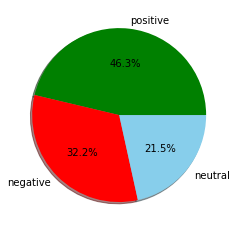

In [ ]:
import matplotlib.pyplot as plt
pichart = count_values_in_column(df_sa,"sentiment")
names= pichart.index
size=pichart["Percentage"]

plt.pie(size, labels=names, colors=['green','red','skyblue'], autopct="%1.1f%%", shadow=True)
p=plt.gcf()
plt.show()